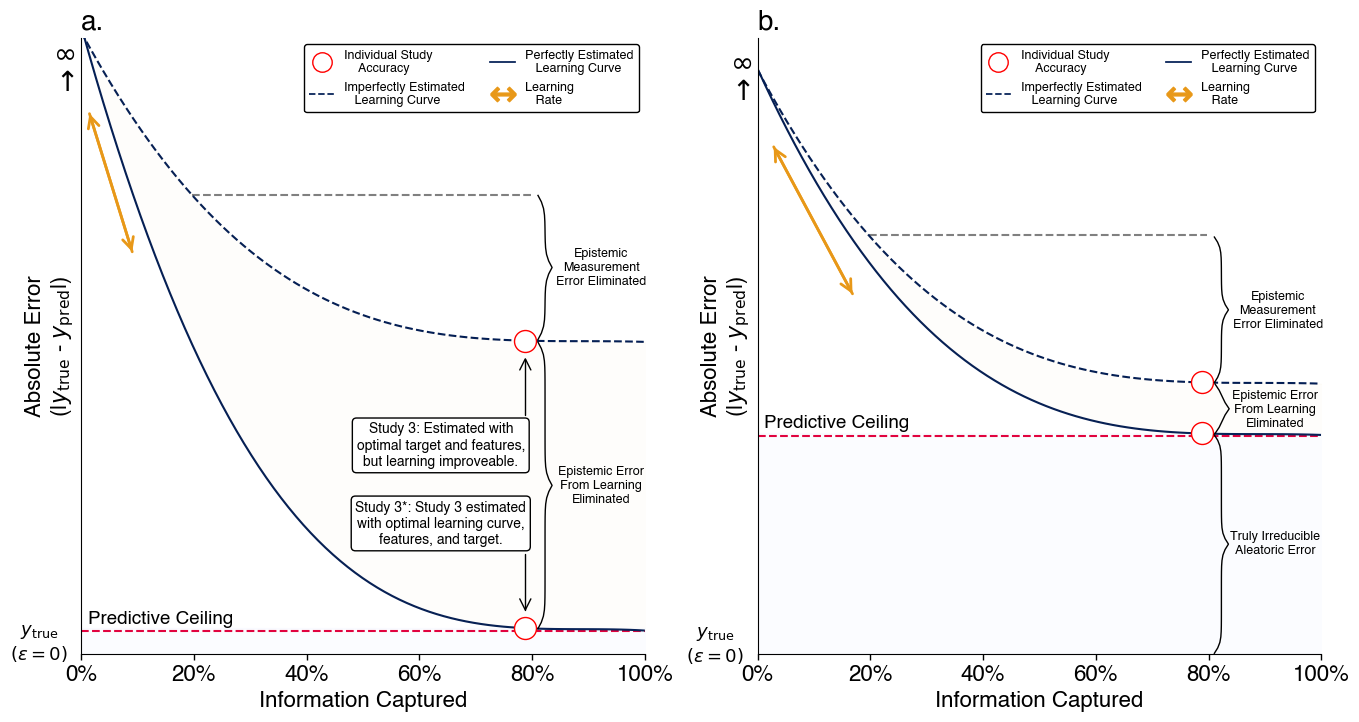

In [16]:
import os
import numpy as np
import seaborn as sns
import matplotlib as mpl
import warnings
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from matplotlib.patches import FancyArrowPatch
from scipy.optimize import curve_fit
import matplotlib.patches as patches
from figure_helpers import draw_brace, polynomial_function
mpl.rcParams['font.family'] = 'Helvetica'
warnings.simplefilter("ignore", UserWarning)

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


fig = plt.figure(figsize=(16, 8))
gs = GridSpec(1, 2)  # Two rows for ax1 and one row split for ax2 and ax3
ax1 = fig.add_subplot(gs[0, 0])  # ax2 on the bottom left
ax2 = fig.add_subplot(gs[0, 1])  # ax3 on the bottom right


x_data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
y_data_original = np.array([0, 0.25, 0.5, 0.725, 0.825, 0.9, 0.95, .960, 0.98, 0.98, 0.9825, 1.025, 1.015])

y_data = 1 - (0.975*y_data_original)

degree = 3
initial_guess = np.ones(degree + 1)  # Initial guess for coefficients
params, covariance = curve_fit(polynomial_function, x_data, y_data, p0=initial_guess)
x1_fit = np.linspace(0, max(x_data) + 1, 100)
y1_fit = polynomial_function(x1_fit, *params)
ax1.plot(x1_fit[:-23], y1_fit[:-23], color='#001c54', linestyle='-', zorder=1)
#ax1.scatter(x1_fit[15], y1_fit[15], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
ax1.scatter(x1_fit[60], y1_fit[60], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
ax1_scatter1_x = x1_fit[15]
ax1_scatter1_y = y1_fit[15]
ax1_scatter1_end_x = x1_fit[60]
ax1_scatter1_end_y = y1_fit[60]
study2star = y1_fit[35]
bracket1_x = x1_fit[60]
bracket1_y1 = y1_fit[60]
y1_fill_fit = y1_fit
y2_fit = y1_fit

y_data = y_data_original * 0.5
y_data = 1 - y_data
params, covariance = curve_fit(polynomial_function, x_data, y_data, p0=initial_guess)
y1_fit = polynomial_function(x1_fit, *params)
ax1.plot(x1_fit[:-23], y1_fit[:-23], color='#001c54', linestyle='--', zorder=1)
#ax1.scatter(x1_fit[15], y1_fit[15], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
#ax1.scatter(x1_fit[32], y1_fit[32], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
ax1.scatter(x1_fit[60], y1_fit[60], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
ax1_scatter2_x = x1_fit[15]
ax1_scatter2_y = y1_fit[15]

ax1_scatter2_mid_x = x1_fit[32]
ax1_scatter2_mid_y = y1_fit[32]
ax1_scatter2_end_x = x1_fit[60]
ax1_scatter2_end_y = y1_fit[60]
bracket1_y2 = y1_fit[60]
y3_fill_fit = y1_fit


legend_elements = [
    Line2D([0], [0], marker='o', color='#001c54', markerfacecolor='w',
           markeredgecolor='r', markersize=14, linewidth=0,
           label='Individual Study\n    Accuracy'),
    Line2D([0], [0], color='#001c54', linestyle='--', linewidth=1.25,
           label='Imperfectly Estimated\n   Learning Curve'),
    Line2D([0], [0], color='#001c54', linestyle='-', linewidth=1.25,
           label='Perfectly Estimated\n   Learning Curve'),
    Line2D([0], [0], color='#E89818', marker='$\leftrightarrow$', markersize=18, linewidth=0,
           label='Learning\n   Rate')
]

ax1.legend(handles=legend_elements, loc='upper right',# bbox_to_anchor=(0, 1),
       frameon=True,
       fontsize=9, framealpha=1, facecolor='w', edgecolor='black', ncols=2)

'''
ax1.annotate(
    "Laplace's Demon (i.e., $\epsilon=0$)",
    xy=(0.09, 0.9),
    xycoords='axes fraction',
    ha='center',
    va='bottom',
    fontsize=13.5,
    color='black'
)
'''

ax1.annotate(
    'Predictive Ceiling',
    xy=(0.14, y2_fit[60]),
    xycoords='axes fraction',
    ha='center',
    va='bottom',
    fontsize=13.5,
    color='black'
)

arrow1 = patches.FancyArrowPatch(
    (x1_fit[1], y1_fit[2]-.085), (x1_fit[7], y1_fit[10]-.17), 
    mutation_scale=20,
    color='#E89818', 
    arrowstyle='->',
    linewidth=2
)
arrow2 = patches.FancyArrowPatch(
    (x1_fit[7], y1_fit[10]-.17), (x1_fit[1], y1_fit[2]-.085), 
    mutation_scale=20,  # Adjust size of the arrowhead
    color='#E89818', 
    arrowstyle='->',  # Triangle arrowhead
    linewidth=2
)
ax1.add_patch(arrow1)
ax1.add_patch(arrow2)

fill_alpha=0.025


ax1.fill_between(x1_fit,
                 y1_fill_fit,
                 y3_fill_fit,
                 color='#efb85f',
                 alpha=fill_alpha
                 )
ax1.annotate(
    'Study 3*: Study 3 estimated\nwith optimal learning curve,\nfeatures, and target.',
    xy=(ax1_scatter1_end_x, ax1_scatter1_end_y + 0.0225),
    xytext=(ax1_scatter1_end_x-1.5, ax1_scatter1_end_y+0.17),
    ha='center',
    va='center',
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="w"),
    arrowprops=dict(
        arrowstyle='->',
        connectionstyle="angle,angleA=0,angleB=90,rad=0",
        color='black',
        mutation_scale=20,
        lw=1
    )
)

ax1.annotate(
    'Study 3: Estimated with\noptimal target and features,\nbut learning improveable.',
    xy=(ax1_scatter2_end_x, ax1_scatter2_end_y - 0.0225),
    xytext=(ax1_scatter2_end_x-1.5, ax1_scatter2_end_y-.17),
    ha='center',
    va='center',
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="w"),
    arrowprops=dict(
        arrowstyle='->',
        connectionstyle="angle,angleA=0,angleB=90,rad=0",
        color='black',
        mutation_scale=20,
        lw=1
    )
)

for ax, title in zip([ax1], ['a.']):
    ax.set_title(title, fontsize=20, loc='left')
    ax.set_yticks([])
    ax.tick_params(width=1, length=4, axis='both', which='major', labelsize=16)
    ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
    ax.set_xlabel('Information Captured', fontsize=16)
    ax.set_xlim(0,10)
    
ax1.set_ylabel('Absolute Error\n'
              r'(|$y_{\text{true}}$ - $y_{\text{pred}}$|)', fontsize=16)

'''
draw_brace(ax1, .1675,
           (ax1_scatter1_end_x+1.455, ax1_scatter1_end_y-0.0825),
           'Truly Irreducible\nAleatoric Error',
           (ax1_scatter1_end_x+.9, ax1_scatter1_end_y-.11),
           brace_scale=0.25, beta_scale=1000., rotate=True, rotate_text=False)
'''
draw_brace(ax1, .465,
           (ax1_scatter2_end_x+1.6, ax1_scatter2_end_y-0.235),
           'Epistemic Error\nFrom Learning\nEliminated',
           (ax1_scatter2_end_x+1.35, ax1_scatter2_end_y-.2675),
           brace_scale=0.25, beta_scale=1000., rotate=True, rotate_text=False, fontsize=9)
draw_brace(ax1, .234,
           (ax1_scatter1_end_x+1.6, 0.6275),
           'Epistemic\nMeasurement\nError Eliminated',
           (ax1_scatter1_end_x+1.35, .595),
           brace_scale=0.25, beta_scale=1000,
           rotate=True, rotate_text=False, fontsize=9)


ax1.fill_between(x1_fit,
                 ax1.get_ylim()[0],
                 y2_fit[60],
                 color='#7ba7ff',
                 alpha=fill_alpha
                 )

#ax1.text(-0.3, 0.09, r'$\text{y}_{\text{True}}$', ha='center', va='center', fontsize=18)

#ax1.text(ax1_scatter2_x+.375, ax1_scatter2_y+.035, r"$f\, (X \mid Y)$", ha='center', va='center', fontsize=14)
#ax1.text(ax1_scatter1_x+.375, ax1_scatter1_y+.03, r"$f^*(X \mid Y)$", ha='center', va='center', fontsize=14)
#ax1.text(ax1_scatter2_mid_x+.5, ax1_scatter2_mid_y+.03, r"$f\, (X_{\text{true}} \mid Y)$", ha='center', va='center', fontsize=14)
#ax1.text(ax1_scatter2_end_x-.560, ax1_scatter2_end_y+.035, r"$f\, (X_{\text{true}} \mid Y_{\text{true}})$",
#         ha='center', va='center', fontsize=14)
#ax1.text(ax1_scatter1_end_x-.560, ax1_scatter1_end_y+.03, r"$f^*(X_{\text{true}} \mid Y_{\text{true}})$",
#         ha='center', va='center', fontsize=14)
ax1.axhline(y=y2_fit[60]-.005, color='#E4003B',
            linestyle='--',
            linewidth=1.5, zorder=-1)
ax1.axhline(y=ax1_scatter2_y, xmin= ax1_scatter2_x/10, xmax= ax1_scatter2_end_x/10+.01,
            color='grey',
            linestyle='--', linewidth=1.5, zorder=-1)







######################## AX2 ############################

#y_data_original = np.array([0, 0.2, 0.3, 0.45, 0.5, 0.55, 0.575, .6, .625, .625, 0.625, .625, .645])
y_data = 1 - (0.6*y_data_original)

degree = 3
initial_guess = np.ones(degree + 1)  # Initial guess for coefficients
params, covariance = curve_fit(polynomial_function, x_data, y_data, p0=initial_guess)
x1_fit = np.linspace(0, max(x_data) + 1, 100)
y1_fit = polynomial_function(x1_fit, *params)
ax2.plot(x1_fit[:-23], y1_fit[:-23], color='#001c54', linestyle='--', zorder=1)
#ax2.scatter(x1_fit[15], y1_fit[15], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
ax2.scatter(x1_fit[60], y1_fit[60], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
ax2_scatter1_x = x1_fit[15]
ax2_scatter1_y = y1_fit[15]
ax2_scatter1_end_x = x1_fit[60]
ax2_scatter1_end_y = y1_fit[60]
study2star = y1_fit[35]
bracket1_x = x1_fit[60]
bracket1_y1 = y1_fit[60]
y1_fill_fit = y1_fit
y2_fit = y1_fit

y_data = y_data_original * 0.7
y_data = 1 - y_data
params, covariance = curve_fit(polynomial_function, x_data, y_data, p0=initial_guess)
y1_fit = polynomial_function(x1_fit, *params)
ax2.plot(x1_fit[:-23], y1_fit[:-23], color='#001c54', linestyle='-', zorder=1)
#ax2.scatter(x1_fit[15], y1_fit[15], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
#ax2.scatter(x1_fit[32], y1_fit[32], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
ax2.scatter(x1_fit[60], y1_fit[60], facecolor='w', edgecolor='r', s=[250], alpha=1, marker='o', zorder=2)
ax2_scatter2_x = x1_fit[15]
ax2_scatter2_y = y1_fit[15]

ax2_scatter2_mid_x = x1_fit[32]
ax2_scatter2_mid_y = y1_fit[32]
ax2_scatter2_end_x = x1_fit[60]
ax2_scatter2_end_y = y1_fit[60]
bracket1_y2 = y1_fit[60]
y3_fill_fit = y1_fit


legend_elements = [
    Line2D([0], [0], marker='o', color='#001c54', markerfacecolor='w',
           markeredgecolor='r', markersize=14, linewidth=0,
           label='Individual Study\n    Accuracy'),
    Line2D([0], [0], color='#001c54', linestyle='--', linewidth=1.25,
           label='Imperfectly Estimated\n   Learning Curve'),
    Line2D([0], [0], color='#001c54', linestyle='-', linewidth=1.25,
           label='Perfectly Estimated\n   Learning Curve'),
    Line2D([0], [0], color='#E89818', marker='$\leftrightarrow$', markersize=18, linewidth=0,
           label='Learning\n   Rate')
]

ax2.legend(handles=legend_elements, loc='upper right',# bbox_to_anchor=(0, 1),
       frameon=True,
       fontsize=9, framealpha=1, facecolor='w', edgecolor='black', ncols=2)

'''
ax2.annotate(
    "Laplace's Demon (i.e., $\epsilon=0$)",
    xy=(0.09, 0.9),
    xycoords='axes fraction',
    ha='center',
    va='bottom',
    fontsize=13.5,
    color='black'
)
'''
ax2.annotate(
    'Predictive Ceiling',
    xy=(0.14, y2_fit[60]-.05),
    xycoords='axes fraction',
    ha='center',
    va='bottom',
    fontsize=13.5,
    color='black'
)

arrow1 = patches.FancyArrowPatch(
    (x1_fit[2], y1_fit[2]-.085), (x1_fit[13], y1_fit[10]-.17), 
    mutation_scale=20,
    color='#E89818', 
    arrowstyle='->',
    linewidth=2
)
arrow2 = patches.FancyArrowPatch(
    (x1_fit[13], y1_fit[10]-.17), (x1_fit[2], y1_fit[2]-.085), 
    mutation_scale=20,  # Adjust size of the arrowhead
    color='#E89818', 
    arrowstyle='->',  # Triangle arrowhead
    linewidth=2
)
ax2.add_patch(arrow1)
ax2.add_patch(arrow2)


'''
ax2.annotate(
    'Study 3*: Study 3 estimated\nwith optimal learning curve,\nfeatures, and target.',
    xy=(ax2_scatter1_end_x, ax2_scatter1_end_y + 0.0225),
    xytext=(ax2_scatter1_end_x-1.25, ax2_scatter1_end_y + 0.11),
    ha='center',
    va='center',
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="w"),
    arrowprops=dict(
        arrowstyle='->',
        connectionstyle="angle,angleA=0,angleB=90,rad=0",
        color='black',
        mutation_scale=20,
        lw=1
    )
)

ax2.annotate(
    'Study 3: Estimated with\noptimal target and features,\nbut learning improveable.',
    xy=(ax2_scatter2_end_x, ax2_scatter2_end_y + 0.0225),
    xytext=(ax2_scatter2_end_x-1.25, ax2_scatter2_end_y + 0.11),
    ha='center',
    va='center',
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="w"),
    arrowprops=dict(
        arrowstyle='->',
        connectionstyle="angle,angleA=0,angleB=90,rad=0",
        color='black',
        mutation_scale=20,
        lw=1
    )
)
'''

for ax, title in zip([ax2], ['b.']):
    ax.set_title(title, fontsize=20, loc='left')
    ax.set_yticks([])
    ax.tick_params(width=1, length=4, axis='both', which='major', labelsize=16)
    ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
    ax.set_xlabel('Information Captured', fontsize=16)
    ax.set_xlim(0,10)
    
ax2.set_ylabel('Absolute Error\n'
              r'(|$y_{\text{true}}$ - $y_{\text{pred}}$|)', fontsize=16)

draw_brace(ax2, .42,
           (ax2_scatter1_end_x+1.6, ax2_scatter1_end_y-0.311),
           'Truly Irreducible\nAleatoric Error',
           (ax2_scatter1_end_x+1.3, ax2_scatter1_end_y-.335),
           brace_scale=0.25, beta_scale=1000., rotate=True, rotate_text=False, fontsize=9)
draw_brace(ax2, .095,
           (ax2_scatter2_end_x+1.6, ax2_scatter2_end_y+.0475),
           'Epistemic Error\nFrom Learning\nEliminated',
           (ax2_scatter2_end_x+1.3, ax2_scatter2_end_y+.0075),
           brace_scale=0.25, beta_scale=1000., rotate=True, rotate_text=False, fontsize=9)
draw_brace(ax2, .28,
           (ax2_scatter1_end_x+1.6, 0.55),
           'Epistemic\nMeasurement\nError Eliminated',
           (ax2_scatter1_end_x+1.35, .51),
           brace_scale=0.25, beta_scale=1000,
           rotate=True, rotate_text=False, fontsize=9)

ax2.text(-0.3, ax2.get_ylim()[1]*.95, '$\infty$\n$↑$',
         ha='center', va='center', fontsize=20)

#ax2.text(-0.3, 0.09, r'$\text{y}_{\text{True}}$', ha='center', va='center', fontsize=18)

#ax2.text(ax2_scatter2_x+.375, ax2_scatter2_y+.035, r"$f\, (X \mid Y)$", ha='center', va='center', fontsize=14)
#ax2.text(ax2_scatter1_x+.375, ax2_scatter1_y+.03, r"$f^*(X \mid Y)$", ha='center', va='center', fontsize=14)
#ax2.text(ax2_scatter2_mid_x+.5, ax2_scatter2_mid_y+.03, r"$f\, (X_{\text{true}} \mid Y)$", ha='center', va='center', fontsize=14)
#ax2.text(ax2_scatter2_end_x-.560, ax2_scatter2_end_y+.035, r"$f\, (X_{\text{true}} \mid Y_{\text{true}})$",
#         ha='center', va='center', fontsize=14)
#ax2.text(ax2_scatter1_end_x-.560, ax2_scatter1_end_y+.03, r"$f^*(X_{\text{true}} \mid Y_{\text{true}})$",
#         ha='center', va='center', fontsize=14)
ax2.axhline(y=y1_fit[60]-.005, color='#E4003B',
            linestyle='--',
            linewidth=1.5, zorder=-1)
ax2.axhline(y=ax2_scatter1_y, xmin= ax2_scatter1_x/10, xmax= ax2_scatter1_end_x/10+.01,
            color='grey',
            linestyle='--', linewidth=1.5, zorder=-1)





ax2.set_ylim(ax1.get_ylim()[0], ax1.get_ylim()[1])


sns.despine()

ax1.set_ylim(0.0, 1)
ax1.text(-0.3, ax1.get_ylim()[1]*.95, '$\infty$\n$↑$',
         ha='center', va='center', fontsize=20)
ax2.fill_between(x1_fit,
                 y1_fit[60],
                 ax2.get_ylim()[0],
                 color='#7ba7ff',
                 alpha=fill_alpha
                 )
ax2.fill_between(x1_fit,
                 y1_fill_fit,
                 y3_fill_fit,
                 color='#efb85f',
                 alpha=fill_alpha
                 )

ax1.text(-0.75, ax1.get_ylim()[0]+.0175, r'$y_{\text{true}}$'+ '\n' + r'$(\epsilon=0)$', ha='center', va='center', fontsize=13)
ax2.text(-0.75, ax2.get_ylim()[0]+.0175, r'$y_{\text{true}}$'+ '\n' + r'$(\epsilon=0)$', ha='center', va='center', fontsize=13)
plt.savefig(os.path.join(os.getcwd(),
                             '..',
                             'output',
                             'unpredictability_figure_si1_new.pdf'),
                bbox_inches='tight')
